In [1]:
import numpy as np
import matplotlib.pyplot as plt

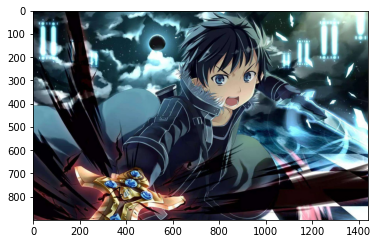

In [2]:
np.random.seed(240)
img = plt.imread("Con4.jpg")
plt.imshow(img)

In [3]:
img.shape

(900, 1440, 3)

In [4]:
offset = np.random.randint(low=0, high=255, size=(img.shape))
offset.reshape(-1)

array([143, 148, 167, ..., 129,  27,  28])

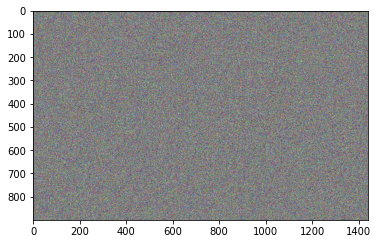

In [5]:
plt.imshow(offset)

In [6]:
encry_img = []
img_flat = img.reshape(-1)
offset_flat = offset.reshape(-1)
print(img_flat.shape, offset_flat.shape)
for i in range(0, len(img_flat)):
    encry_img.append((img_flat[i] + offset_flat[i]) % 256)
print(encry_img)

(3888000,) (3888000,)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
encr_np_arr = np.array(encry_img, dtype=np.int32)

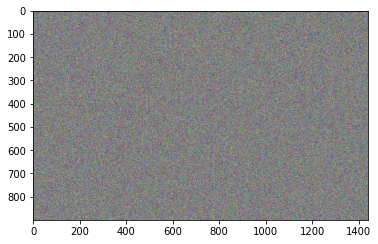

In [8]:
plt.imshow(encr_np_arr.reshape(img.shape))

In [9]:
np.random.seed(240)
offset_flat = np.random.randint(low=0, high=255, size=(img.shape)).reshape(-1)
print(offset_flat)
decry_img = []
for i in range(0, len(encr_np_arr)):
    if encr_np_arr[i] - offset_flat[i] < 0:
        decry_img.append(256 + encr_np_arr[i] - offset_flat[i])
    else:
        decry_img.append(encr_np_arr[i] - offset_flat[i])

[143 148 167 ... 129  27  28]


In [11]:
for i in range(0, len(decry_img)):
    if not decry_img[i] == img_flat[i]:
        print(decry_img[i], img_flat[i], offset_flat[i])

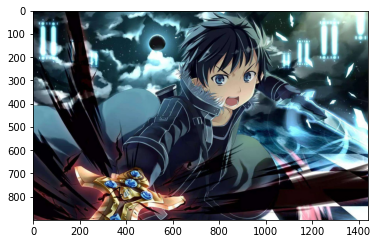

In [10]:
decry_np_img = np.array(decry_img, dtype=np.int32).reshape(img.shape)
plt.imshow(decry_np_img)